In [107]:
%matplotlib inline

In [108]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode


# Illustration of transforms

This example illustrates the various transforms available in `the
torchvision.transforms module <transforms>`.


In [109]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8)
model.load_state_dict(torch.load('model.pth'))
model = model.eval()
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [110]:
path = os.path.join('data' , 'test')
class_names = os.listdir(path)
print(class_names)
path1 = os.path.join(path , class_names[0])
lenght = len(os.listdir(path1))
print(lenght)

['AMD', 'CNV', 'CSR', 'DME', 'DR', 'DRUSEN', 'MH', 'NORMAL']
350


In [111]:
# sphinx_gallery_thumbnail_path = "../../gallery/assets/transforms_thumbnail.png"

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('data/test/AMD/amd_test_1001.jpg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [112]:
transforms_dir = 'transform'
if not os.path.exists(transforms_dir):
    os.makedirs(transforms_dir)

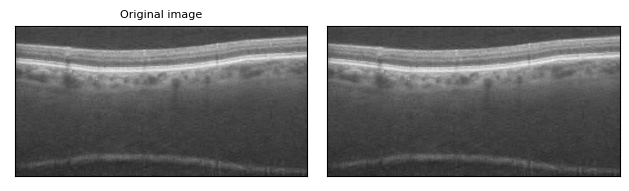

In [113]:
plot([orig_img])

In [114]:
#predict the image above
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
img = transform(orig_img)
img = img.unsqueeze(0)
img = img.to(device)
with torch.no_grad():
    outputs = model(img)
    _, preds = torch.max(outputs, 1)
print('Predicted: {}'.format(class_names[preds]))

Predicted: AMD


## Pad
The :class:`~torchvision.transforms.Pad` transform
(see also :func:`~torchvision.transforms.functional.pad`)
fills image borders with some pixel values.



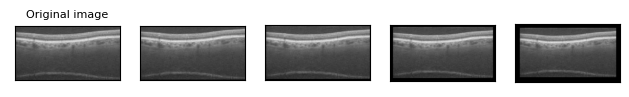

In [115]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

In [116]:
for i, img in enumerate(padded_imgs):
    img.save(os.path.join(transforms_dir, 'pad_{}.jpg'.format(i)))

## Resize
The :class:`~torchvision.transforms.Resize` transform
(see also :func:`~torchvision.transforms.functional.resize`)
resizes an image.



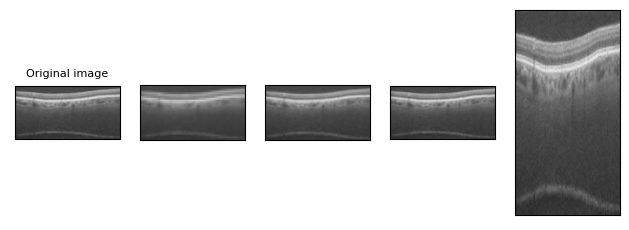

In [117]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

In [118]:
for i, img in enumerate(resized_imgs):
    img.save(os.path.join(transforms_dir, 'resize_{}.jpg'.format(i)))

## CenterCrop
The :class:`~torchvision.transforms.CenterCrop` transform
(see also :func:`~torchvision.transforms.functional.center_crop`)
crops the given image at the center.



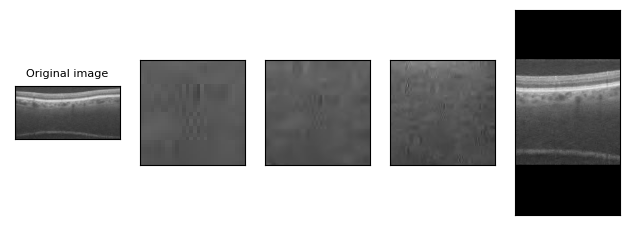

In [119]:
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)

In [120]:
for i, img in enumerate(center_crops):
    img.save(os.path.join(transforms_dir, 'center_crop_{}.jpg'.format(i)))

## FiveCrop
The :class:`~torchvision.transforms.FiveCrop` transform
(see also :func:`~torchvision.transforms.functional.five_crop`)
crops the given image into four corners and the central crop.



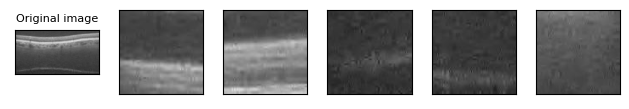

In [121]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

In [122]:
for i, img in enumerate([top_left, top_right, bottom_left, bottom_right, center]):
    img.save(os.path.join(transforms_dir, 'five_crop_{}.jpg'.format(i)))

## Grayscale
The :class:`~torchvision.transforms.Grayscale` transform
(see also :func:`~torchvision.transforms.functional.to_grayscale`)
converts an image to grayscale



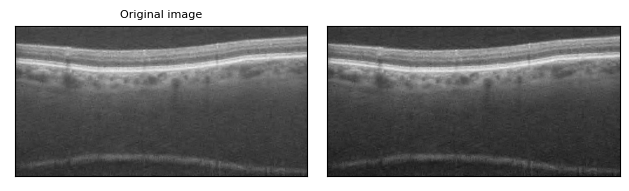

In [123]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

In [124]:
#gray_img.save(os.path.join(transforms_dir, 'gray.jpg'))

## Random transforms
The following transforms are random, which means that the same transfomer
instance will produce different result each time it transforms a given image.

### ColorJitter
The :class:`~torchvision.transforms.ColorJitter` transform
randomly changes the brightness, saturation, and other properties of an image.



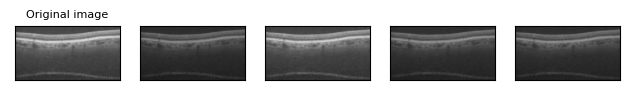

In [125]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

In [126]:
for i, img in enumerate(jitted_imgs):
    img.save(os.path.join(transforms_dir, 'jitter_{}.jpg'.format(i)))

### GaussianBlur
The :class:`~torchvision.transforms.GaussianBlur` transform
(see also :func:`~torchvision.transforms.functional.gaussian_blur`)
performs gaussian blur transform on an image.



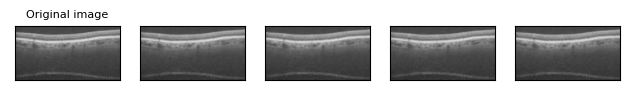

In [127]:
blurrer = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

In [128]:
for i, img in enumerate(blurred_imgs):
    img.save(os.path.join(transforms_dir, 'blur_{}.jpg'.format(i)))

### RandomPerspective
The :class:`~torchvision.transforms.RandomPerspective` transform
(see also :func:`~torchvision.transforms.functional.perspective`)
performs random perspective transform on an image.



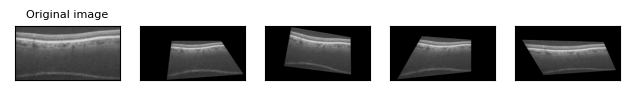

In [129]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

In [130]:
for i, img in enumerate(perspective_imgs):
    img.save(os.path.join(transforms_dir, 'perspective_{}.jpg'.format(i)))

### RandomRotation
The :class:`~torchvision.transforms.RandomRotation` transform
(see also :func:`~torchvision.transforms.functional.rotate`)
rotates an image with random angle.



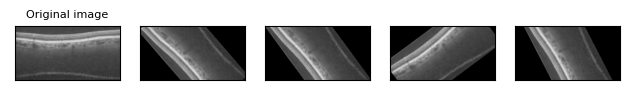

In [131]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

In [132]:
for i, img in enumerate(rotated_imgs):
    img.save(os.path.join(transforms_dir, 'rotate_{}.jpg'.format(i)))

### RandomAffine
The :class:`~torchvision.transforms.RandomAffine` transform
(see also :func:`~torchvision.transforms.functional.affine`)
performs random affine transform on an image.



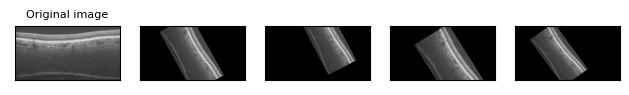

In [133]:
affine_transfomer = T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

In [134]:
for i, img in enumerate(affine_imgs):
    img.save(os.path.join(transforms_dir, 'affine_{}.jpg'.format(i)))

### ElasticTransform
The :class:`~torchvision.transforms.ElasticTransform` transform
(see also :func:`~torchvision.transforms.functional.elastic_transform`)
Randomly transforms the morphology of objects in images and produces a
see-through-water-like effect.



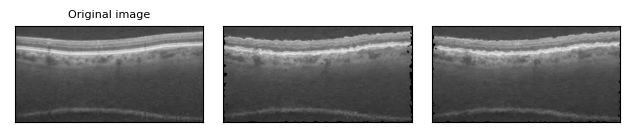

In [135]:
elastic_transformer = T.ElasticTransform(alpha=250.0)
transformed_imgs = [elastic_transformer(orig_img) for _ in range(2)]
plot(transformed_imgs)

In [136]:
for i, img in enumerate(transformed_imgs):
    img.save(os.path.join(transforms_dir, 'elastic_{}.jpg'.format(i)))

### RandomCrop
The :class:`~torchvision.transforms.RandomCrop` transform
(see also :func:`~torchvision.transforms.functional.crop`)
crops an image at a random location.



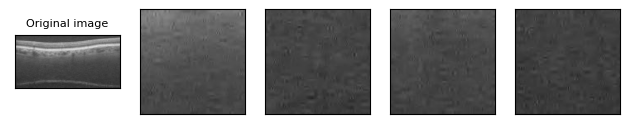

In [137]:
cropper = T.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

In [138]:
for i, img in enumerate(crops):
    img.save(os.path.join(transforms_dir, 'crop_{}.jpg'.format(i)))

### RandomResizedCrop
The :class:`~torchvision.transforms.RandomResizedCrop` transform
(see also :func:`~torchvision.transforms.functional.resized_crop`)
crops an image at a random location, and then resizes the crop to a given
size.



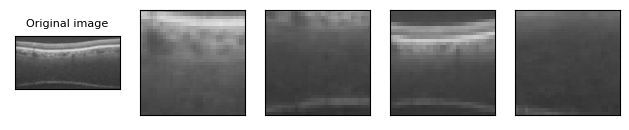

In [139]:
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

In [140]:
for i, img in enumerate(resized_crops):
    img.save(os.path.join(transforms_dir, 'resized_crop_{}.jpg'.format(i)))

### RandomInvert
The :class:`~torchvision.transforms.RandomInvert` transform
(see also :func:`~torchvision.transforms.functional.invert`)
randomly inverts the colors of the given image.



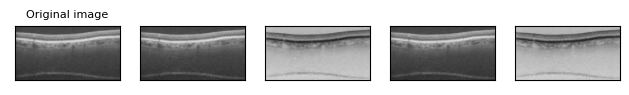

In [141]:
inverter = T.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

In [142]:
for i, img in enumerate(invertered_imgs):
    img.save(os.path.join(transforms_dir, 'invert_{}.jpg'.format(i)))

### RandomPosterize
The :class:`~torchvision.transforms.RandomPosterize` transform
(see also :func:`~torchvision.transforms.functional.posterize`)
randomly posterizes the image by reducing the number of bits
of each color channel.



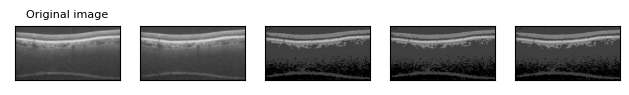

In [143]:
posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

In [144]:
for i, img in enumerate(posterized_imgs):
    img.save(os.path.join(transforms_dir, 'posterize_{}.jpg'.format(i)))

### RandomSolarize
The :class:`~torchvision.transforms.RandomSolarize` transform
(see also :func:`~torchvision.transforms.functional.solarize`)
randomly solarizes the image by inverting all pixel values above
the threshold.



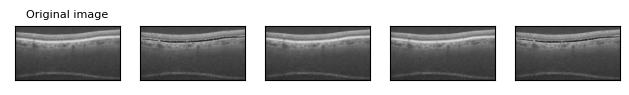

In [145]:
solarizer = T.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

In [146]:
for i, img in enumerate(solarized_imgs):
    img.save(os.path.join(transforms_dir, 'solarize_{}.jpg'.format(i)))

### RandomAdjustSharpness
The :class:`~torchvision.transforms.RandomAdjustSharpness` transform
(see also :func:`~torchvision.transforms.functional.adjust_sharpness`)
randomly adjusts the sharpness of the given image.



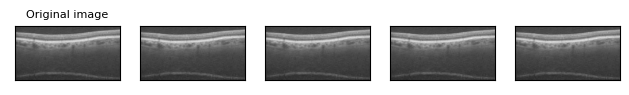

In [147]:
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

In [148]:
for i, img in enumerate(sharpened_imgs):
    img.save(os.path.join(transforms_dir, 'sharpness_{}.jpg'.format(i)))

### RandomAutocontrast
The :class:`~torchvision.transforms.RandomAutocontrast` transform
(see also :func:`~torchvision.transforms.functional.autocontrast`)
randomly applies autocontrast to the given image.



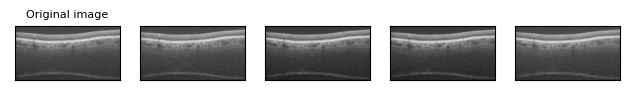

In [149]:
autocontraster = T.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

In [150]:
for i, img in enumerate(autocontrasted_imgs):
    img.save(os.path.join(transforms_dir, 'autocontrast_{}.jpg'.format(i)))

### RandomEqualize
The :class:`~torchvision.transforms.RandomEqualize` transform
(see also :func:`~torchvision.transforms.functional.equalize`)
randomly equalizes the histogram of the given image.



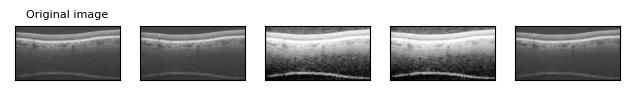

In [151]:
equalizer = T.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

In [152]:
for i, img in enumerate(equalized_imgs):
    img.save(os.path.join(transforms_dir, 'equalize_{}.jpg'.format(i)))

### AutoAugment
The :class:`~torchvision.transforms.AutoAugment` transform
automatically augments data based on a given auto-augmentation policy.
See :class:`~torchvision.transforms.AutoAugmentPolicy` for the available policies.



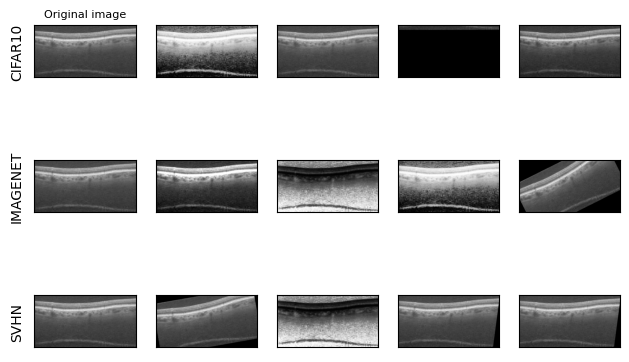

In [153]:
policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs, row_title=row_title)

### RandAugment
The :class:`~torchvision.transforms.RandAugment` transform automatically augments the data.



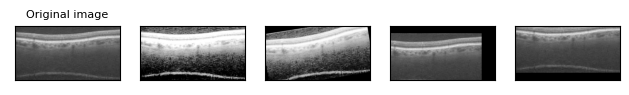

In [154]:
augmenter = T.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

In [155]:
for i, img in enumerate(imgs):
    img.save(os.path.join(transforms_dir, 'rand_augment_{}.jpg'.format(i)))

### TrivialAugmentWide
The :class:`~torchvision.transforms.TrivialAugmentWide` transform automatically augments the data.



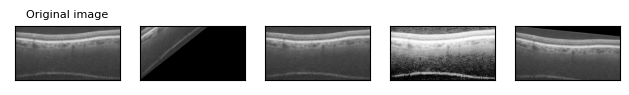

In [156]:
augmenter = T.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

In [157]:
for i, img in enumerate(imgs):
    img.save(os.path.join(transforms_dir, 'trivial_augment_wide_{}.jpg'.format(i)))

### AugMix
The :class:`~torchvision.transforms.AugMix` transform automatically augments the data.



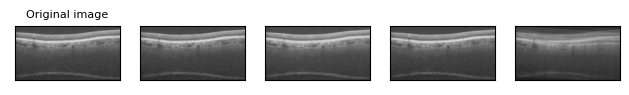

In [158]:
augmenter = T.AugMix()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

In [159]:
for i, img in enumerate(imgs):
    img.save(os.path.join(transforms_dir, 'augmix_{}.jpg'.format(i)))

## Randomly-applied transforms

Some transforms are randomly-applied given a probability ``p``.  That is, the
transformed image may actually be the same as the original one, even when
called with the same transformer instance!

### RandomHorizontalFlip
The :class:`~torchvision.transforms.RandomHorizontalFlip` transform
(see also :func:`~torchvision.transforms.functional.hflip`)
performs horizontal flip of an image, with a given probability.



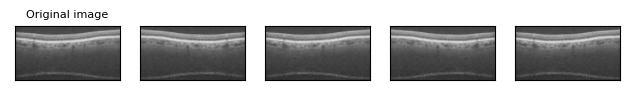

In [160]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

In [161]:
for i, img in enumerate(transformed_imgs):
    img.save(os.path.join(transforms_dir, 'hflip_{}.jpg'.format(i)))

### RandomVerticalFlip
The :class:`~torchvision.transforms.RandomVerticalFlip` transform
(see also :func:`~torchvision.transforms.functional.vflip`)
performs vertical flip of an image, with a given probability.



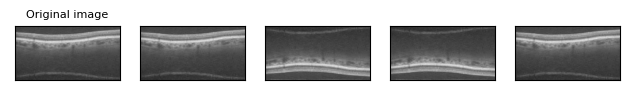

In [162]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

In [163]:
for i, img in enumerate(transformed_imgs):
    img.save(os.path.join(transforms_dir, 'vflip_{}.jpg'.format(i)))

### RandomApply
The :class:`~torchvision.transforms.RandomApply` transform
randomly applies a list of transforms, with a given probability.



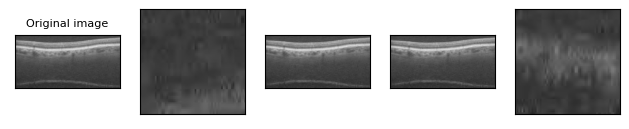

In [164]:
applier = T.RandomApply(transforms=[T.RandomCrop(size=(64, 64))], p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

In [165]:
for i, img in enumerate(transformed_imgs):
    img.save(os.path.join(transforms_dir, 'random_apply_{}.jpg'.format(i)))

In [170]:
correct = 0
for i in range(len(os.listdir(transforms_dir))):
    img_name = os.listdir(transforms_dir)[i]
    img = Image.open(os.path.join(transforms_dir, img_name))
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)
    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)
    #print('Predicted: {}'.format(class_names[preds]))
    if preds == 0:
        correct += 1
    else:
        print('he made a mistake while transforming the image into {}'.format(img_name))
print('Accuracy: {}'.format(correct / len(os.listdir(transforms_dir))))


he made a mistake while transforming the image in affine_0.jpg
he made a mistake while transforming the image in affine_1.jpg
he made a mistake while transforming the image in affine_2.jpg
he made a mistake while transforming the image in affine_3.jpg
he made a mistake while transforming the image in invert_1.jpg
he made a mistake while transforming the image in invert_3.jpg
he made a mistake while transforming the image in posterize_1.jpg
he made a mistake while transforming the image in posterize_2.jpg
he made a mistake while transforming the image in posterize_3.jpg
he made a mistake while transforming the image in rand_augment_0.jpg
he made a mistake while transforming the image in rand_augment_1.jpg
he made a mistake while transforming the image in resized_crop_0.jpg
he made a mistake while transforming the image in resized_crop_1.jpg
he made a mistake while transforming the image in rotate_0.jpg
he made a mistake while transforming the image in rotate_1.jpg
he made a mistake whil

In [167]:
'''
for i in range(len(os.listdir(transforms_dir))):
    img_name = os.listdir(transforms_dir)[i]
    os.remove(os.path.join(transforms_dir, img_name))
'''

'\nfor i in range(len(os.listdir(transforms_dir))):\n    img_name = os.listdir(transforms_dir)[i]\n    os.remove(os.path.join(transforms_dir, img_name))\n'